In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix, cohen_kappa_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import math
from helper import index as slowHelpers

In [92]:
dataset1 = pd.read_pickle("zone_1.pickle")

def foo(list_of_zones):
    frames = np.empty(len(list_of_zones), dtype=object)
    for i, zone_file_name in enumerate(list_of_zones):
        zone = pd.read_pickle(zone_file_name)
        mask =  slowHelpers.createBalancedMask(zone["label_3m"].values.reshape((2997,2620)), 3, 5)
        mask = np.where(np.invert(mask.reshape(-1)))
        zone.drop(zone.index[mask], inplace=True)
        frames[i] = zone
    return pd.concat(frames)


In [137]:
dataset = foo(["zone_1.pickle","zone_2.pickle"])
dataset.head()

,label_3m,hpmf_raw,skyview_raw,impundment_raw,slope_raw,conic_mean,skyview_non_ditch,skyview_gabor,skyview_mean_2,skyview_mean_3,...,slope_non_ditch,slope_mean_2,slope_mean_3,slope_mean_4,slope_mean_6,slope_median_2,slope_median_4,slope_median_6,slope_std_6,slope_skew_2
10,False,0.07,0.996068,0.000000,3.407336,0.996068,1.148734,0.058043,0.990937,0.985861,...,0.0,5.238484,7.253425,8.496400,7.718819,5.298771,7.231401,6.933877,4.539006,2.889653
11,False,0.10,0.993270,0.031219,6.201339,0.993270,1.104430,0.049943,0.984612,0.976936,...,0.0,8.486603,9.309156,9.047301,7.873080,7.110470,7.318882,7.018539,4.475975,4.764871
12,True,0.04,0.988611,0.000000,12.432929,0.988611,1.063291,0.042721,0.969887,0.972630,...,0.0,12.136389,10.234071,8.969830,8.031528,13.848537,7.297962,7.087861,4.450762,4.953790
13,True,0.00,0.950178,0.000000,17.800203,0.950178,1.031646,0.037244,0.963547,0.971669,...,0.0,12.416411,9.623360,8.699916,8.372251,12.432929,7.099165,7.429540,4.418486,4.138262
14,True,-0.11,0.970290,0.161133,11.325196,0.970290,1.003165,0.034127,0.967300,0.969923,...,0.0,9.531024,9.091637,8.819653,8.610934,7.087861,7.110470,7.527294,4.301797,5.386572


In [144]:
X = dataset.loc[:, dataset.columns != "label_3m"]
y = dataset["label_3m"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.001, random_state=42)

In [145]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [146]:
datasetZone3 = pd.read_pickle("zone_3.pickle")
X_test = datasetZone3.loc[:, datasetZone3.columns != "label_3m"]
y_test = datasetZone3["label_3m"]

Accuracy score              0.9723241052757592
Recall score                0.6213479200931384
Area under curve score(AUC) 0.3849300815575267
Average precision score(AP) 0.0932658582292138
ROC                         0.798053780608873
Cohen's kappa               0.2276944277053231
Confusion matrix
 [[7601202  196825]
 [  20490   33623]]


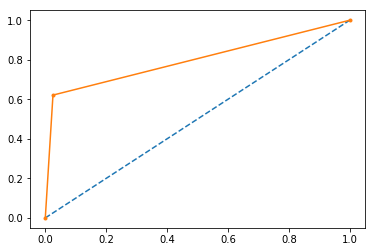

In [151]:
#from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
# auc, average_precision_score, f1_score
y_pred = clf.predict(X_test)
print("Accuracy score             ",accuracy_score(y_test,y_pred))
print("Recall score               ",recall_score(y_test,y_pred))

precision, recall, threshholds = precision_recall_curve(y_test,y_pred)
auc_score = auc(recall, precision)
print("Area under curve score(AUC)", auc_score)
ap = average_precision_score(y_test, y_pred)
print("Average precision score(AP)", ap)
print("ROC                        ", roc_auc_score(y_test, y_pred))

print("Cohen's kappa              ", cohen_kappa_score(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))


fpr, tpr, thresholds = roc_curve(y_test,y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

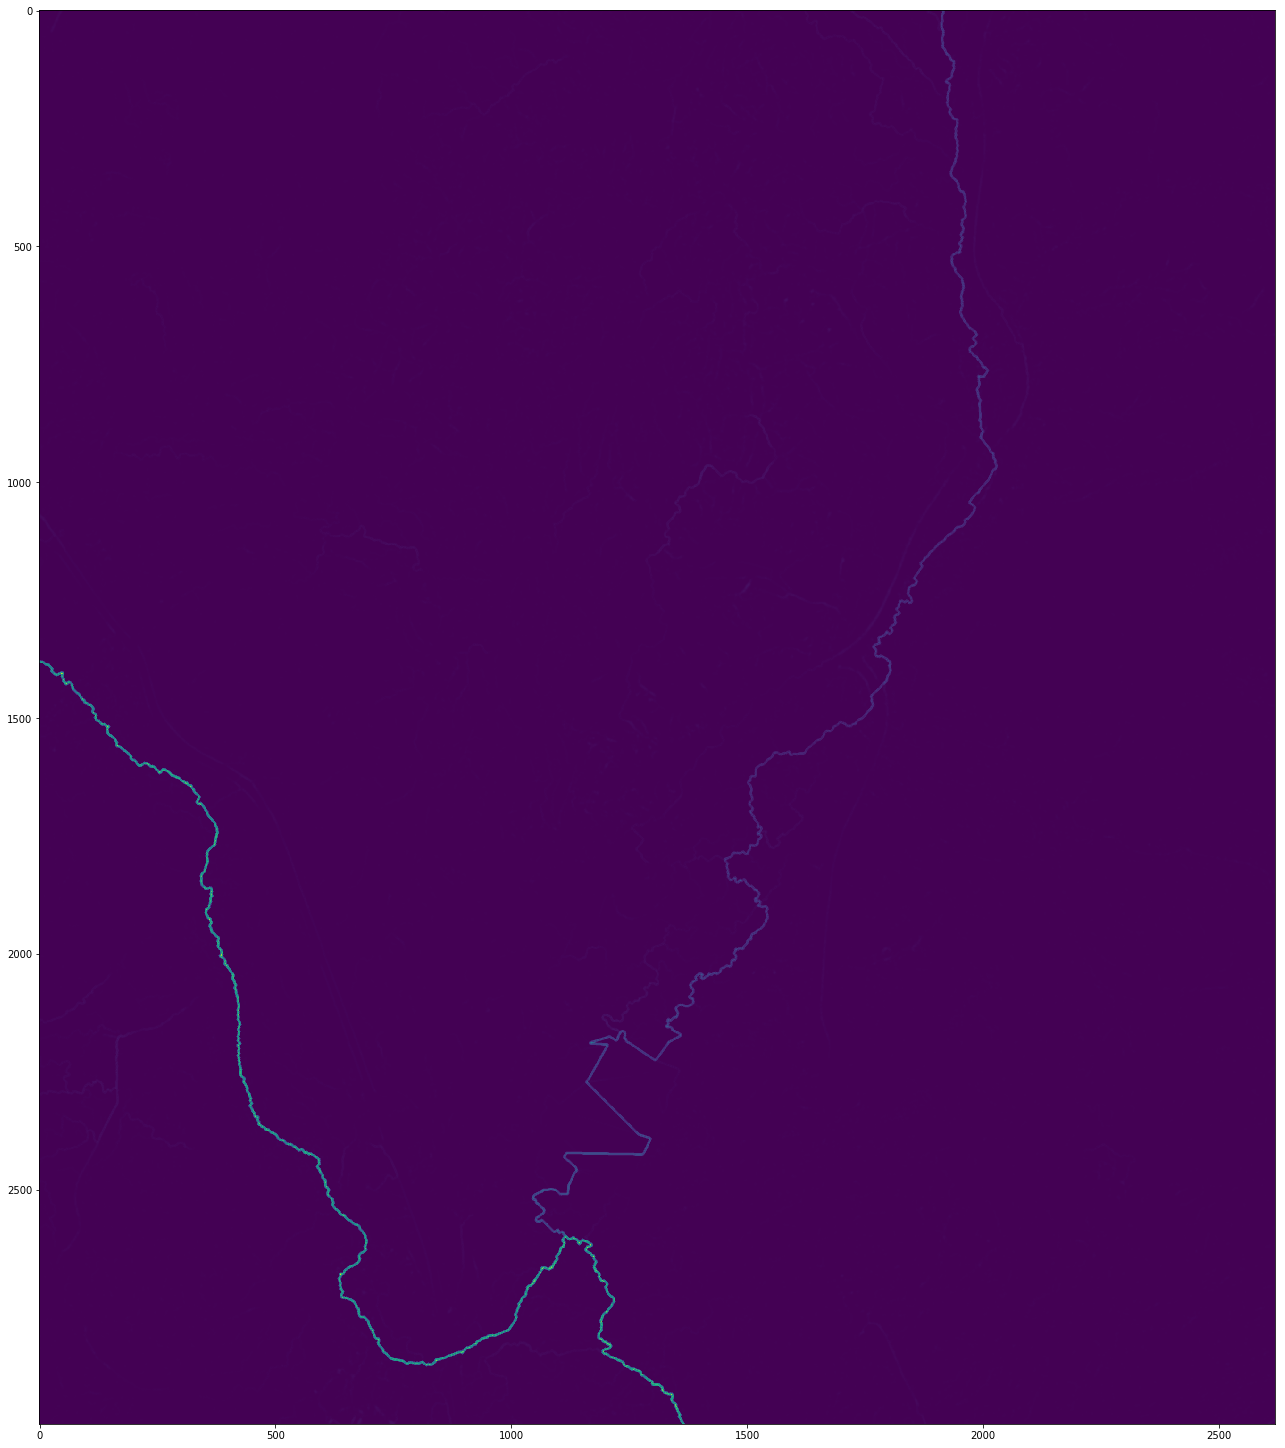

In [184]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(datasetZone3["impundment_mean_3"].values.reshape((2997,2620)))

In [ ]:
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)

 1. impundment_mean_4    (0.057)
 2. impundment_mean_3    (0.052)
 3. impundment_mean_6    (0.052)
 4. impundment_median_6  (0.042)
 5. impundment_median_4  (0.042)
 6. impundment_std_6     (0.038)
 7. hpmf_mean_4          (0.036)
 8. impundment_amplified (0.033)
 9. skyview_gabor        (0.033)
10. hpmf_gabor           (0.032)
11. hpmf_mean_6          (0.031)
12. impundment_median_2  (0.030)
13. slope_non_ditch      (0.029)
14. slope_std_6          (0.027)
15. skyview_non_ditch    (0.026)
16. impundment_mean_2    (0.024)
17. hpmf_std_6           (0.023)
18. hpmf_mean_3          (0.023)
19. slope_median_6       (0.021)
20. skyview_std_6        (0.020)
21. slope_mean_6         (0.019)
22. hpmf_filter          (0.017)
23. skyview_median_6     (0.017)
24. hpmf_median_4        (0.016)
25. impundment_skew_2    (0.015)
26. skyview_mean_6       (0.015)
27. slope_mean_4         (0.014)
28. skyview_median_4     (0.013)
29. skyview_mean_4       (0.013)
30. slope_median_4       (0.013)
31. slope_

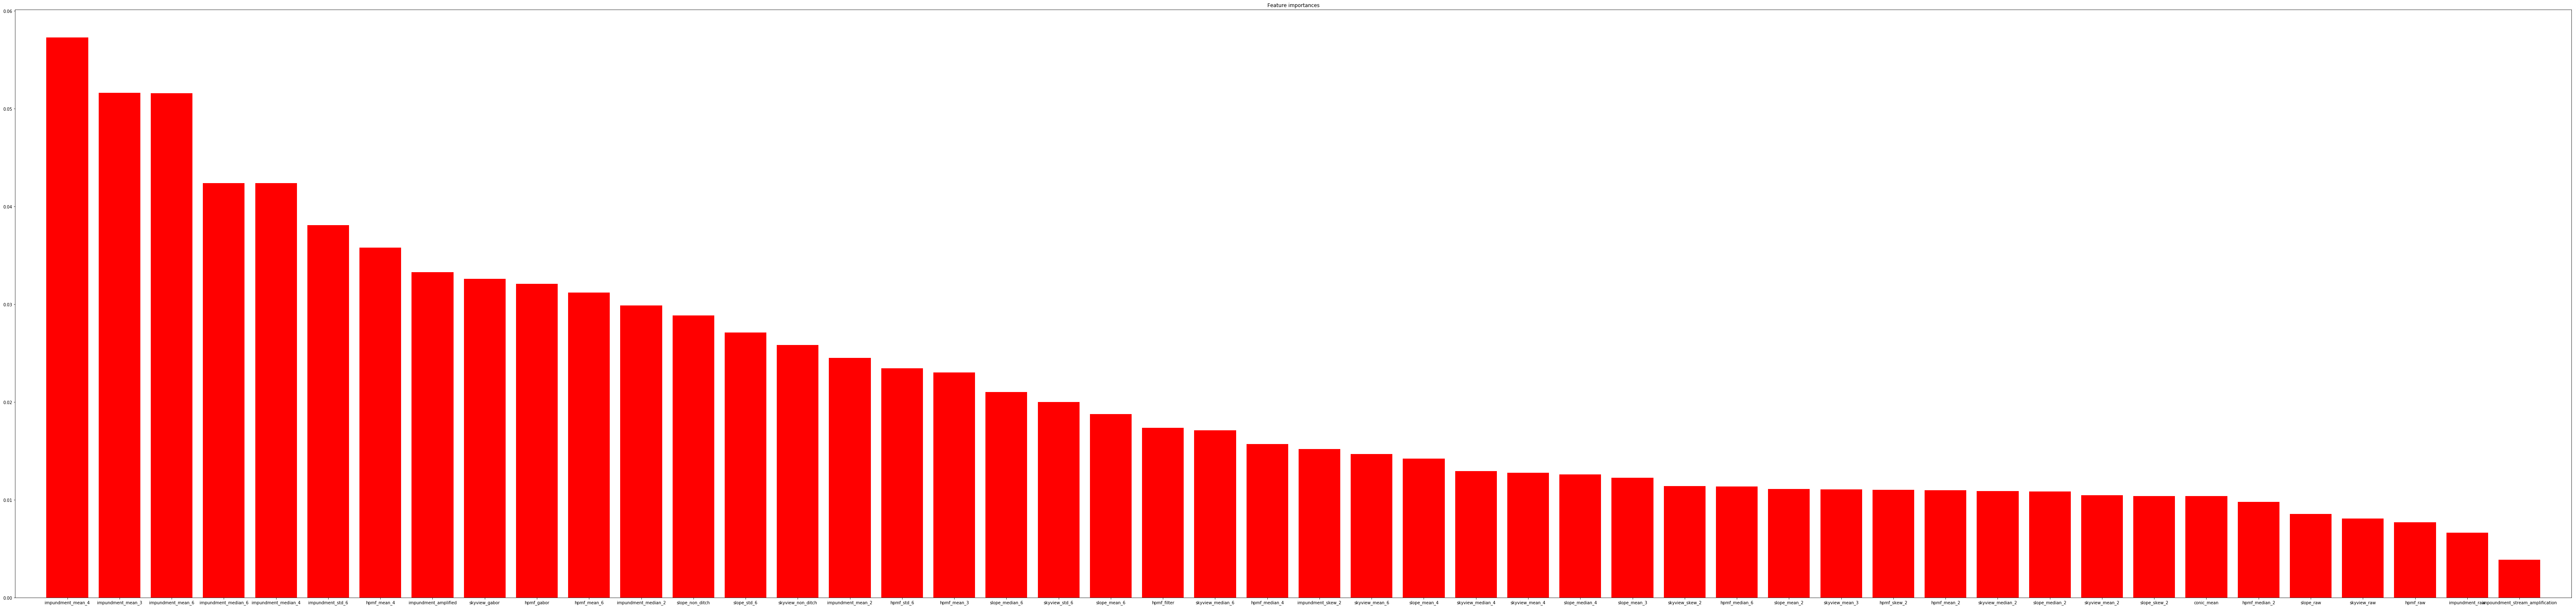

In [257]:
feature_names = dataset.columns.values.tolist()[1:]
tuple_features = [(feature_names[i], importance, std[i]) for i, importance in enumerate(importances)]
tuple_features.sort(key=lambda x: x[1], reverse=True)

for f in range(X.shape[1]):
    print("{:>2}. {:<20} ({:.3f})".format(f + 1, tuple_features[f][0], tuple_features[f][1]))

plt.figure(num=None, figsize=(110,26), facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), [x[1] for x in tuple_features],
       color="r", yerr=[x[2] for x in tuple_features], align="center")
plt.xticks(range(X.shape[1]), [x[0] for x in tuple_features])
plt.xlim([-1, X.shape[1]])
plt.show()